# PROJEKT 2: Women's E-commerce Clothing Reviews

In this project we'll use an e-commerce dataset from a womens's clothing store. The dataset constitute of some client information, a titled review with rating and some product intel. My interest here is to analyze the costumer profile, what makes a good product get a positive review and a sentiment analysis to see the positivity of comments. As an extra, I will also make a simple word count.

            key features: EDA, Data Cleaning, Data Visualization, Sentiment Analysis, Word Cloud

#### Objectives:

   * EDA
   * Analyse customer preferences
   * Analyse for correlation between product features and customer preferences
   * Define what makes a good product
   * Define what makes product get a good review
   * Create a simple word count
   
#### Phases:
   * Data Preparation
   * Data Analysis
   * Recommendation System
   * Graphics & Results

### Data Preparation


In [1]:
#lib imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
from textblob import TextBlob
import nltk
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

#load dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

Now that we already loaded our dataset, we can make some tests and define what needs to be worked.

In [2]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df.isnull().describe()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486,23486,23486,23486,23486,23486,23486,23486,23486,23486,23486
unique,1,1,1,2,2,1,1,1,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False
freq,23486,23486,23486,19676,22641,23486,23486,23486,23472,23472,23472


We can see that we have some NaN values, lets work on it. We also have an unnamed category that might use to be an index, we can get rid of it

In [6]:
#remove 'Unnamed: 0' row
df = df.drop('Unnamed: 0', axis = 1)
df.head(1)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


<AxesSubplot:>

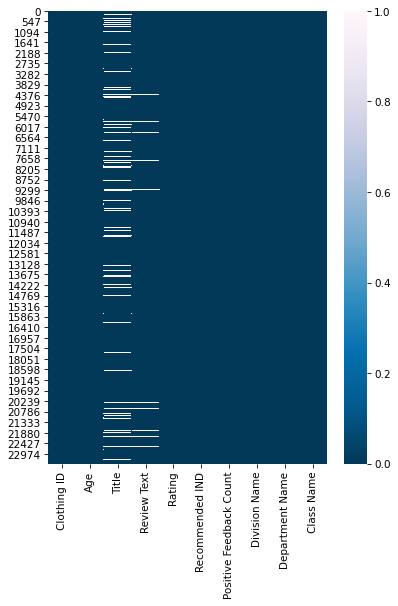

In [7]:
#NaN values visualization
plt.subplots(figsize=(6, 8), dpi=75)
sns.heatmap(data = df.isnull(),cmap="PuBu_r")

As we see, the null values are mostly in the title row, with some minor blank reviews. We can change the NaN titles to 'No Title' and the NaN reviews to 'Blank Review'

In [8]:
#change NaN values
df['Title'] = df['Title'].fillna('No Title')
df['Review Text'] = df['Review Text'].fillna('Blank Review')
df.isnull().describe()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486,23486,23486,23486,23486,23486,23486,23486,23486,23486
unique,1,1,1,1,1,1,1,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,23486,23486,23486,23486,23486,23486,23486,23472,23472,23472


Is seens that we still have some NaN values on Division/Departament/Class Names, lets try to look at them

In [9]:
#NaN values visualization
df[df['Class Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,No Title,Blank Review,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


It seens that most of this items are related too... socks? We also have at least 3 hoodies entries and a completely null review at index 13787. Lets drop the null review and after we get a better look in the features names we can find suitable categories for these items. 

In [10]:
#look for unique values
print(df['Division Name'].unique())
print(df['Department Name'].unique())
print(df['Class Name'].unique())

['Initmates' 'General' 'General Petite' nan]
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


Now that we have some idea of the categories, we can properly classify the remeaning reviews.


Lets put:
* ID 72/152/184/136  as General/Bottoms/Socks
* ID 492/772 as General/Jackets/Hoodies
* ID 665 unfortunately can't figure out, so it will be droped

In [11]:
#drop 21532 review
df = df.drop(21532)

In [12]:
#add categories on NaN's
socks_list = [72,152,184,136]
hoodies_list = [492,772]

def nan_socks(socks):
    for x in socks:
        df.loc[df['Clothing ID'] == x, 'Division Name'] = 'General'
        df.loc[df['Clothing ID'] == x, 'Department Name'] = 'Bottoms'
        df.loc[df['Clothing ID'] == x, 'Class Name'] = 'Socks'

def nan_hoodies(hoodies):
    for x in hoodies:
        df.loc[df['Clothing ID'] == x, 'Division Name'] = 'General'
        df.loc[df['Clothing ID'] == x, 'Department Name'] = 'Jackets'
        df.loc[df['Clothing ID'] == x, 'Class Name'] = 'Hoodies'
    
nan_socks(socks_list)
nan_hoodies(hoodies_list)    

In [13]:
df.isnull().describe()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23485,23485,23485,23485,23485,23485,23485,23485,23485,23485
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,23485,23485,23485,23485,23485,23485,23485,23485,23485,23485


<AxesSubplot:>

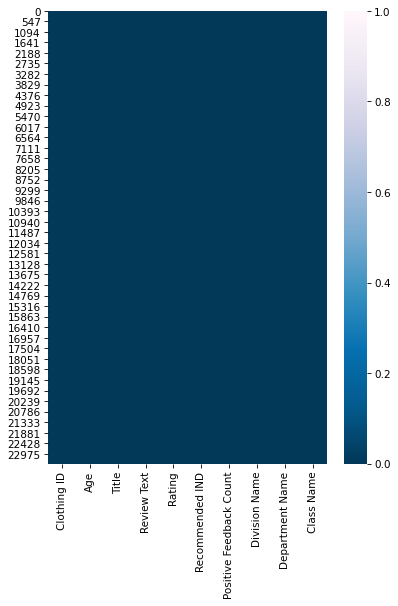

In [14]:
plt.subplots(figsize=(6, 8), dpi=75)
sns.heatmap(data = df.isnull(),cmap="PuBu_r", vmin = 0, vmax = 1)

Done, now lets see the features of this dataframe

In [15]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Analysis

This is what we want to do now:
* Group by division
* Group by departament
* Group by class

* Look for correlations between features
* Create frames for graphics



In [16]:
#Total reviews by rating
df_rate = df['Rating'].value_counts().reset_index().rename(columns={'Rating':'Count','index':'Rating'})
df_rate.head()

,Rating,Count
0,5,13130
1,4,5077
2,3,2871
3,2,1565
4,1,842


In [17]:
df_div = df.groupby('Division Name', as_index = False).mean().sort_values('Rating',ascending=False).reset_index(drop=True).drop('Clothing ID', axis = 1)
df_div

,Division Name,Age,Rating,Recommended IND,Positive Feedback Count
0,Initmates,41.137816,4.286285,0.852197,1.804261
1,General Petite,43.334729,4.211084,0.825985,2.601601
2,General,43.342062,4.177379,0.816995,2.576931


In [18]:
df_dep = df.groupby('Department Name', as_index = False).mean().sort_values('Rating',ascending=False).reset_index(drop=True).drop('Clothing ID', axis = 1)
df_dep

,Department Name,Age,Rating,Recommended IND,Positive Feedback Count
0,Bottoms,43.080882,4.290441,0.851628,2.113708
1,Intimate,41.295677,4.280115,0.850144,1.887608
2,Jackets,43.958494,4.267375,0.836873,2.815637
3,Tops,44.125908,4.172239,0.815151,2.427111
4,Dresses,42.114892,4.150815,0.808197,3.087514
5,Trend,44.058824,3.815126,0.739496,3.369748


In [19]:
df_class = df.groupby('Class Name', as_index = False).mean().sort_values('Rating',ascending=False).reset_index(drop=True).drop('Clothing ID', axis = 1)
df_class

,Class Name,Age,Rating,Recommended IND,Positive Feedback Count
0,Socks,37.888889,5.000000,1.000000,0.666667
1,Hoodies,42.500000,5.000000,1.000000,0.250000
2,Casual bottoms,26.500000,4.500000,1.000000,0.000000
3,Layering,41.527397,4.376712,0.883562,1.315068
4,Jeans,43.115955,4.360942,0.881430,1.759372
5,Lounge,42.717800,4.301013,0.859624,2.321274
6,Jackets,43.813920,4.295455,0.845170,2.826705
7,Sleep,43.100877,4.285088,0.855263,1.750000
8,Intimates,39.155844,4.279221,0.857143,0.779221
9,Legwear,41.545455,4.278788,0.860606,1.272727


Looks like we have a total of 3 Divisions, 6 Departments and 22 Classes.

Now lets look at the age count.

In [20]:
#reviews by age
df_age = df['Age'].value_counts().to_frame().reset_index().rename(columns={'Age':'Review Count','index':'Age'})
df_age.head()

,Age,Review Count
0,39,1269
1,35,909
2,36,842
3,34,804
4,38,780


Text(0.5, 1.0, 'Number of Reviews by Age')

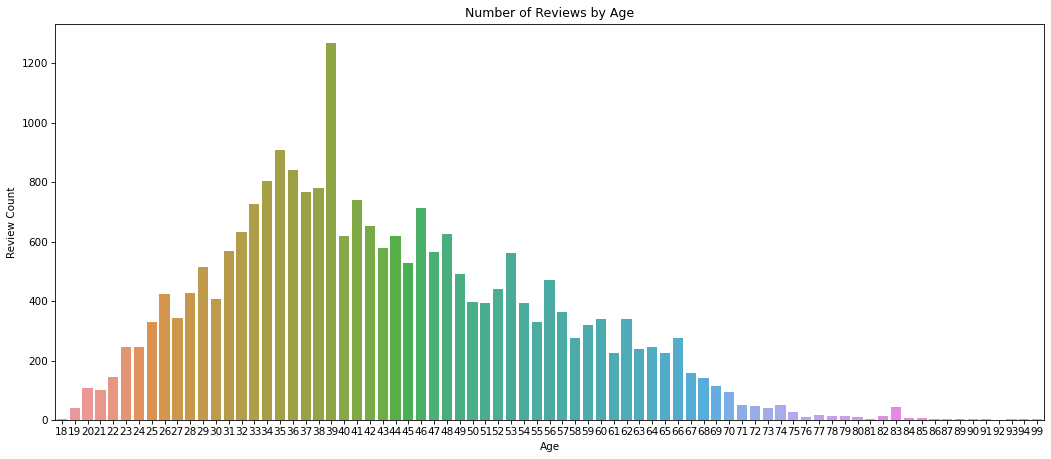

In [21]:
fig, ax = plt.subplots(figsize=(17, 7), dpi=75)
sns.barplot(data = df_age, x = 'Age', y = 'Review Count').set_title('Number of Reviews by Age')

Don't worry, we will be back with this graph latter. 

In [22]:
print(df['Division Name'].value_counts().to_frame().reset_index(), ' \n\n ',
      df['Department Name'].value_counts().to_frame().reset_index(), '\n\n ',
      df['Class Name'].value_counts().to_frame().reset_index())

            index  Division Name
0         General          13863
1  General Petite           8120
2       Initmates           1502  

        index  Department Name
0      Tops            10468
1   Dresses             6319
2   Bottoms             3808
3  Intimate             1735
4   Jackets             1036
5     Trend              119 

               index  Class Name
0          Dresses        6319
1            Knits        4843
2          Blouses        3097
3         Sweaters        1428
4            Pants        1388
5            Jeans        1147
6       Fine gauge        1100
7           Skirts         945
8          Jackets         704
9           Lounge         691
10            Swim         350
11       Outerwear         328
12          Shorts         317
13           Sleep         228
14         Legwear         165
15       Intimates         154
16        Layering         146
17           Trend         119
18           Socks           9
19         Hoodies           4
20  C

So, lets try to find some correlations between the atributes.

In [23]:
#pairplot Recommended IND
#sns.pairplot(data = df, hue = 'Recommended IND')

In [24]:
#pairplot Division Name
#sns.pairplot(data = df, hue = 'Division Name')

As expected, there is a visual correlation bethwen Rating and Recommended IND

Text(0.5, 1.0, 'Rating Correlation')

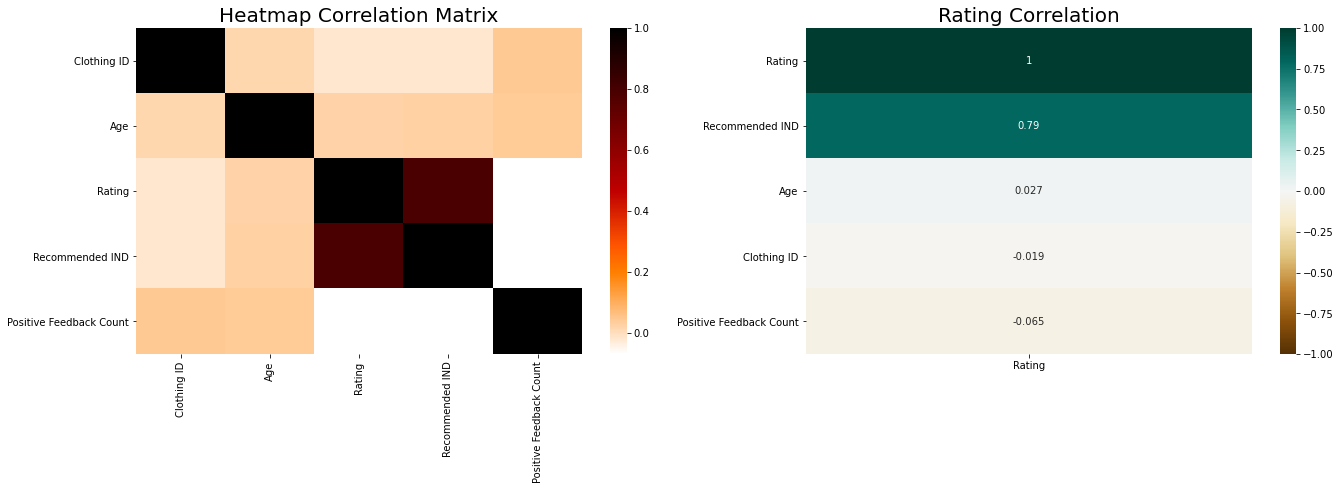

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

#plot 1
sns.heatmap(df.corr(), cmap = 'gist_heat_r', ax = ax1).set_title('Heatmap Correlation Matrix', fontsize = 20)
#plot 2
sns.heatmap(df.corr()[['Rating']].sort_values(by='Rating', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG', ax = ax2).set_title('Rating Correlation', fontsize = 20)

This heatmap only endorse the idea of a positive correlation between Rating and Recommended IND.

Strangely Positive Feedback Count doesn't seens to have a good correlation with other positive features.

### Data Vizualization

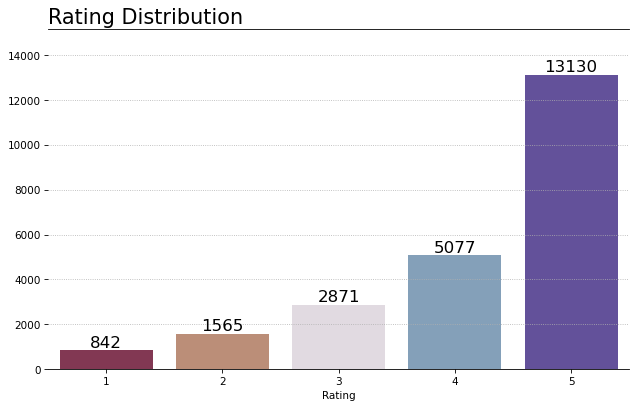

In [26]:
#Rating distribution
#plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=75)
sns.barplot(data = df_rate, x = 'Rating', y = 'Count', palette = 'twilight_shifted_r')

#title & axis
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title('Rating Distribution',
             fontdict = {'fontsize': 20},
            loc = 'left')
ax.set_ylabel('')
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0,ymax*1.1)

#xtick values
rate_list = list(range(0,5))
ticks = df_rate.sort_values(by = 'Count', ascending = True).reset_index()
for i in rate_list:
    ax.text(x = i, y = ticks['Count'][i],
            s = ticks['Count'][i],
            horizontalalignment= 'center', verticalalignment = 'bottom', 
            fontsize=16)

In [27]:
df_id = df
df_id['Rating Mean'] = df_id[['Clothing ID','Rating']].groupby('Clothing ID').mean()
df_id = df_id.drop_duplicates('Clothing ID')
df_id.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Rating Mean
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,5.0
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,4.0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,4.0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,5.0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5.0


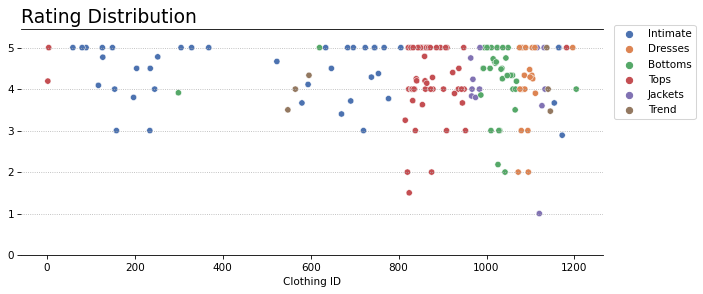

In [28]:
#scatter of rating by cloth id and hue as department
#create a rate by id column
fig, ax = plt.subplots(figsize=(10, 4), dpi=75)
sns.scatterplot(data = df_id, x = 'Clothing ID', y = 'Rating Mean', hue = 'Department Name', palette = 'deep')

#title & axis
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title('Rating Distribution',
             fontdict = {'fontsize': 18},
            loc = 'left')
ax.set_ylabel('')
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0,ymax*1.05)
ax.legend(loc = (1.02,0.6))

[Text(0, 0, 'Dresses'),
 Text(1, 0, 'Knits'),
 Text(2, 0, 'Blouses'),
 Text(3, 0, 'Sweaters'),
 Text(4, 0, 'Pants'),
 Text(5, 0, 'Jeans'),
 Text(6, 0, 'Fine gauge'),
 Text(7, 0, 'Skirts'),
 Text(8, 0, 'Jackets'),
 Text(9, 0, 'Lounge'),
 Text(10, 0, 'Swim'),
 Text(11, 0, 'Outerwear'),
 Text(12, 0, 'Shorts'),
 Text(13, 0, 'Sleep'),
 Text(14, 0, 'Legwear'),
 Text(15, 0, 'Intimates'),
 Text(16, 0, 'Layering'),
 Text(17, 0, 'Trend'),
 Text(18, 0, 'Socks'),
 Text(19, 0, 'Hoodies'),
 Text(20, 0, 'Casual bottoms'),
 Text(21, 0, 'Chemises')]

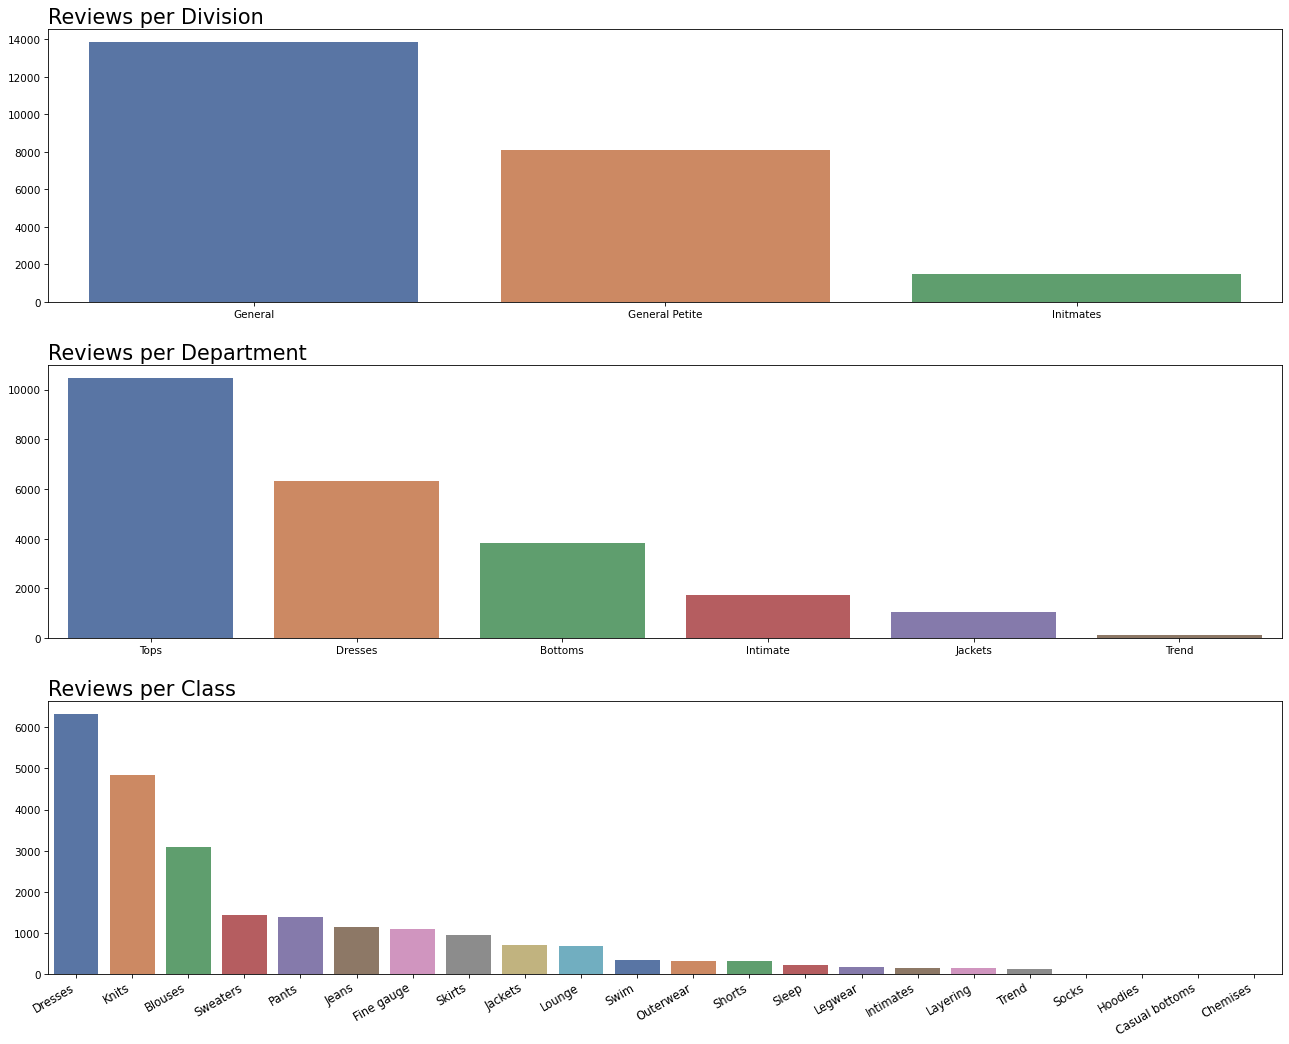

In [29]:
#Number of reviews per Division
#setup
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(18, 14), dpi=75)
fig.tight_layout(pad = 4.0)


#plot1
sns.countplot(data = df, x = 'Division Name', order = df['Division Name'].value_counts().index, 
              ax=ax1, palette = 'deep')
#title & axis
xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.set_title('Reviews per Division',
             fontdict = {'fontsize': 20},
            loc = 'left')
ax1.set_ylabel('')
ax1.set_xlabel('')

#plot 2
sns.countplot(data = df, x = 'Department Name', order = df['Department Name'].value_counts().index, 
              ax=ax2, palette = 'deep')
#title & axis
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.set_title('Reviews per Department',
             fontdict = {'fontsize': 20},
            loc = 'left')
ax2.set_ylabel('')
ax2.set_xlabel('')

#plot 3
sns.countplot(data = df, x = 'Class Name', order = df['Class Name'].value_counts().index, 
              ax=ax3, palette = 'deep')
#title & axis
xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.set_title('Reviews per Class',
              fontdict = {'fontsize': 20},
              loc = 'left')
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_xticklabels(df['Class Name'].value_counts().index, rotation=30, fontdict={'horizontalalignment': 'right', 'size':11})

Text(0.5, 0, 'Rating')

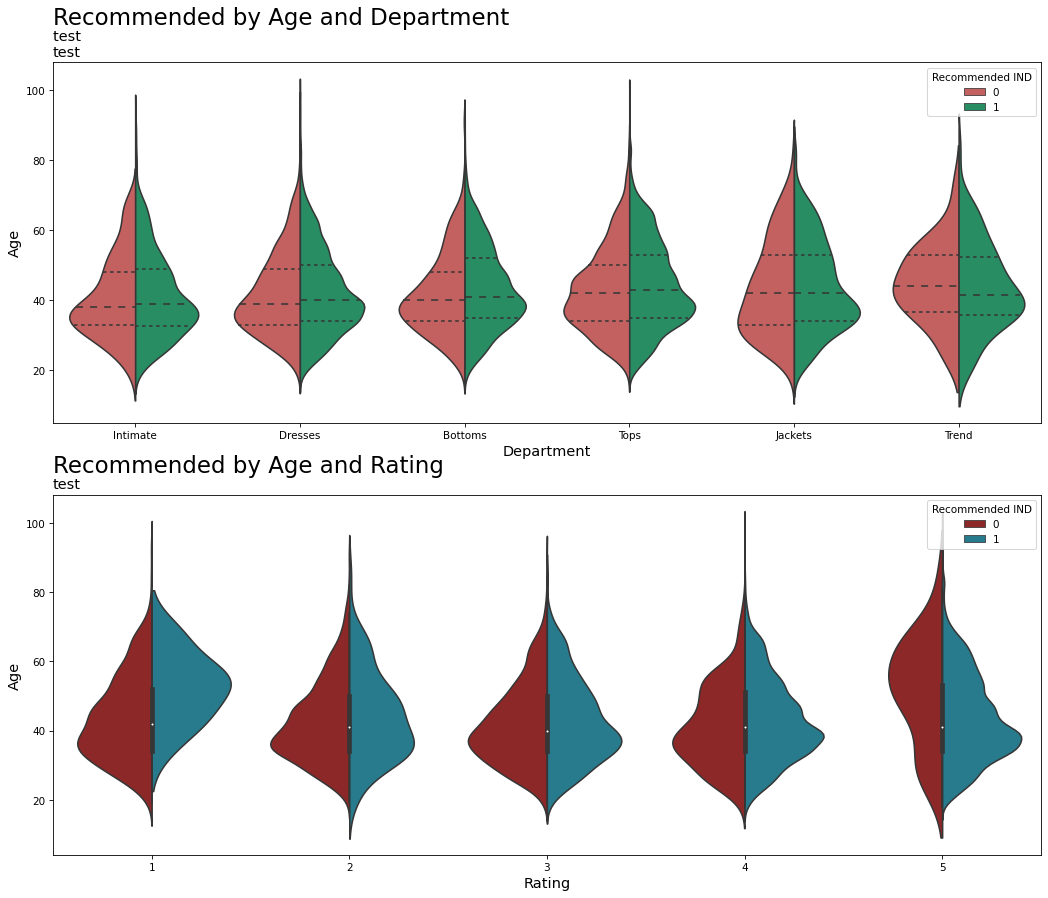

In [30]:
#violinplot rating age positive review
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 14), dpi=75)

#colors
colors_div1 = ['#D35151', '#179E66']
colors_div2 = ['#9E1717', '#17869E']

#plot1
sns.violinplot(data = df, x = 'Department Name', y = 'Age',
               hue = 'Recommended IND',split = True, inner = 'quart',
               ax = ax1, palette = colors_div1              
              )
#title & axis
xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.set_title('test \ntest',
             fontdict = {'fontsize': 14},
            loc = 'left')
ax1.text(s = 'Recommended by Age and Department',
        fontsize = 22,
        x=xmin, 
        y=ymax*1.1)
ax1.set_ylabel('Age',fontsize = 14)
ax1.set_xlabel('Department',fontsize = 14)

#plot2
sns.violinplot(data = df, x = 'Rating', y = 'Age',
               hue = 'Recommended IND', split = True,
              ax = ax2, palette = colors_div2
              )
#title & axis
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.set_title('test',
             fontdict = {'fontsize': 14},
            loc = 'left')
ax2.text(s = 'Recommended by Age and Rating',
        fontsize = 22,
        x=xmin, 
        y=ymax*1.06)
ax2.set_ylabel('Age',fontsize = 14)
ax2.set_xlabel('Rating',fontsize = 14)

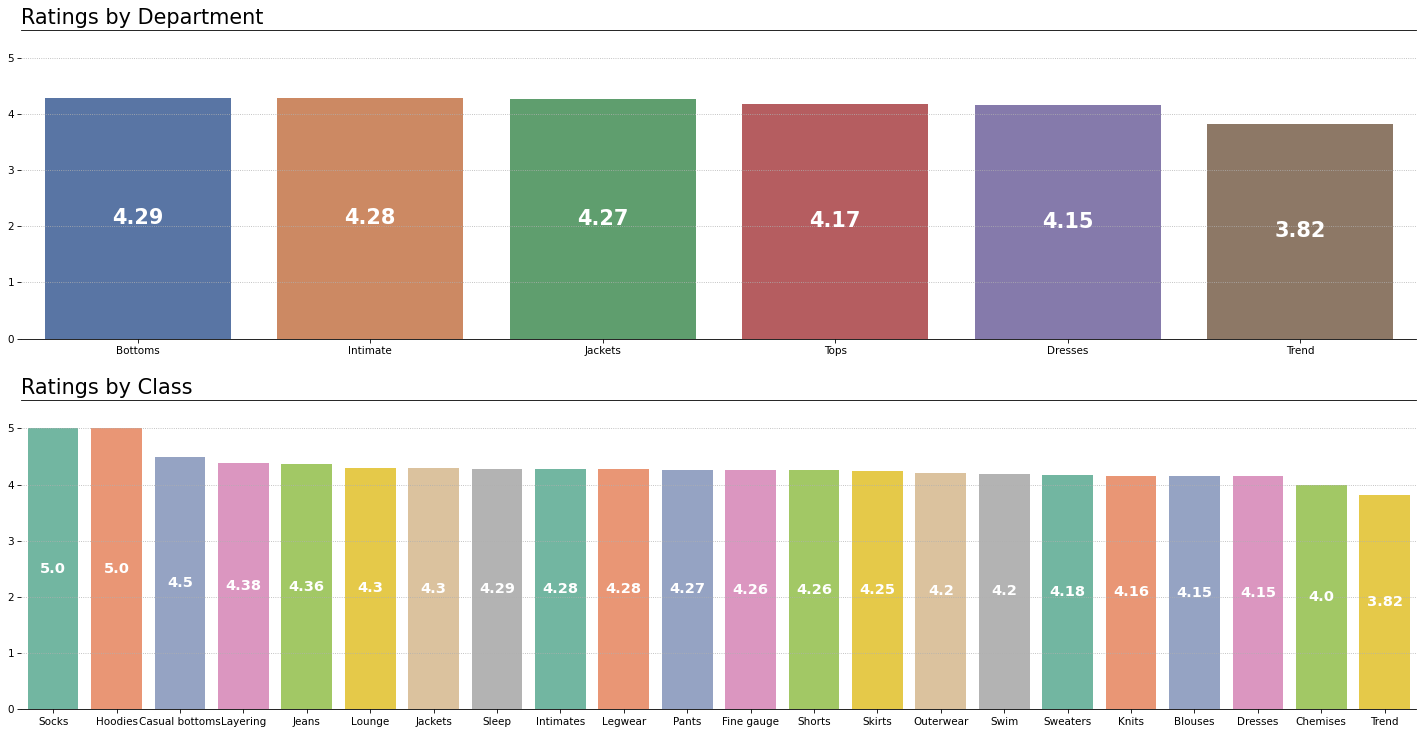

In [31]:
#Rating By Department and Class
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 12), dpi=75)

#plot ax1
sns.barplot(data = df_dep, x = 'Department Name', y = 'Rating', ax = ax1, palette='deep')
#titles & axis
ax1.set_title('Ratings by Department', fontsize = 20, loc = 'left')
ax1.set_ylim(0,5.5)
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_ylabel('')
ax1.set_xlabel('')
#ticks means
number_list1 = [0,1,2,3,4,5]
ticks = df_dep
ticks.head()
for i in number_list1:
    ax1.text(x = i, y = (ticks['Rating'][i])/2, 
            s=round(ticks['Rating'][i],2), 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=20, color = 'White', fontweight='bold')

#plot ax2
sns.barplot(data = df_class, x = 'Class Name', y = 'Rating', ax = ax2, palette='Set2')
#titles & axis
ax2.set_title('Ratings by Class', fontsize = 20, loc = 'left')
ax2.set_ylim(0,5.5)
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_ylabel('')
ax2.set_xlabel('')
#ticks means
number_list2 = list(range(0,22))
ticks = df_class
ticks.head()
for i in number_list2:
    ax2.text(x = i, y = (ticks['Rating'][i])/2, 
            s=round(ticks['Rating'][i],2), 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=14, color = 'White', fontweight='bold')

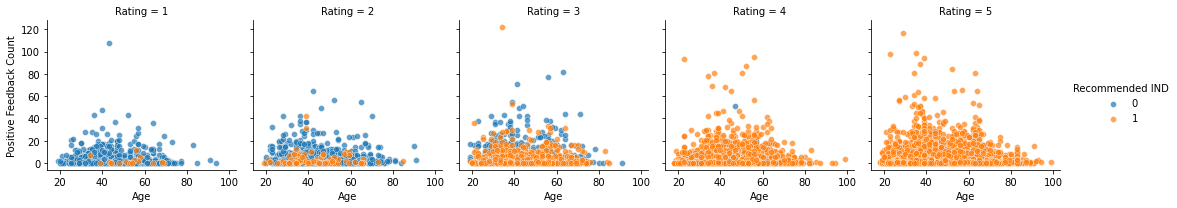

In [32]:
fig = sns.FacetGrid(data = df, col = "Rating", hue="Recommended IND", height = 3, aspect = 1)
fig.map(sns.scatterplot, "Age", "Positive Feedback Count", alpha=.7)
fig.add_legend()

As expected, reviews with minor ratings tends to not recommend the product.

In [33]:
#Countplot by age and rating and by recomendation 

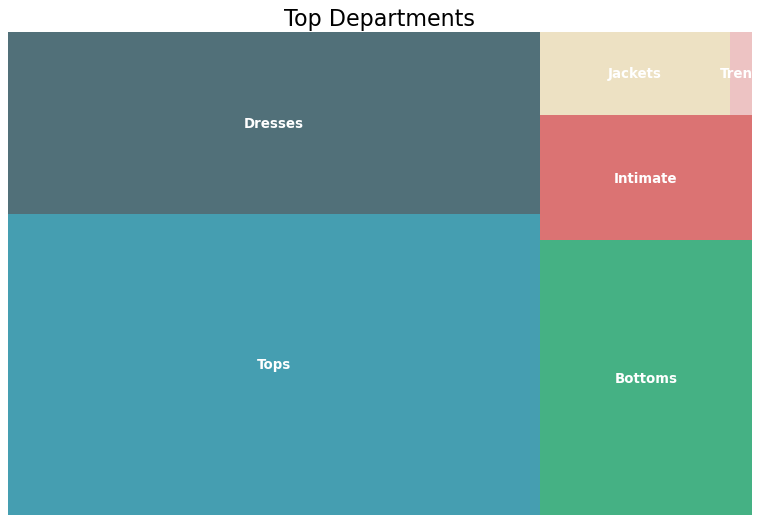

In [34]:
#square Class count

df_square = df['Department Name'].value_counts()
labels = df_square.index
sizes = df_square.values
colors = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']


# Draw Plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
squarify.plot(sizes=sizes, label=labels, color = colors, pad = False,
              text_kwargs={'fontsize':12,'weight':'bold',"color":"white"}, alpha=.8)

# Titles & Axis
plt.title('Top Departments',fontsize=20)
plt.axis('off');


Text(0.5, 1.0, 'test')

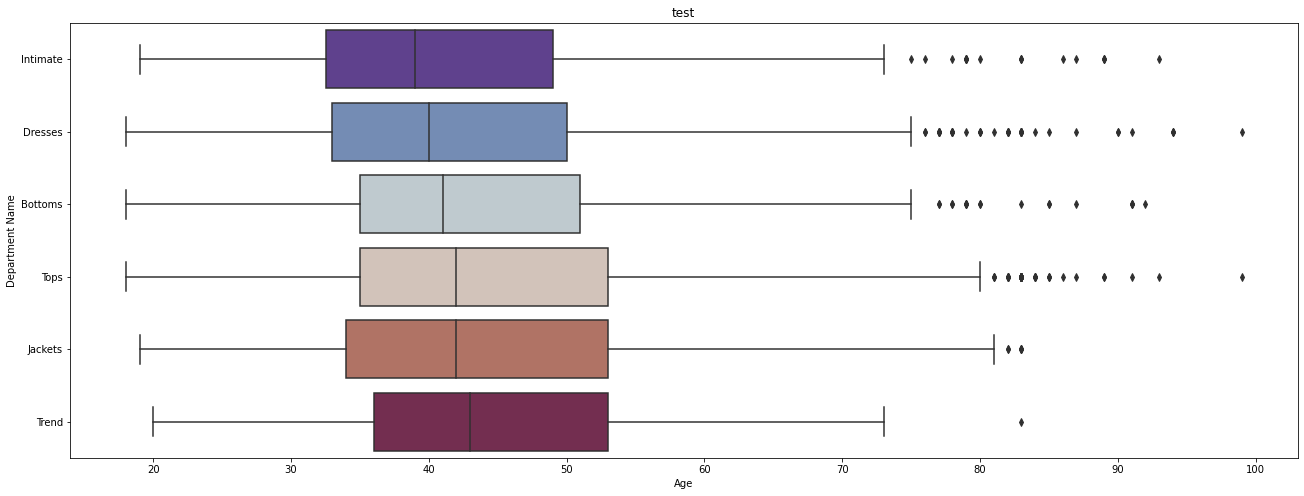

In [35]:
fig, ax1 = plt.subplots(figsize = (22, 8))
sns.boxplot(data = df, x = 'Age', y = 'Department Name', palette= 'twilight_shifted')

ax1.set_title('test')

Text(0.0, 1.0, 'Ratings by Age')

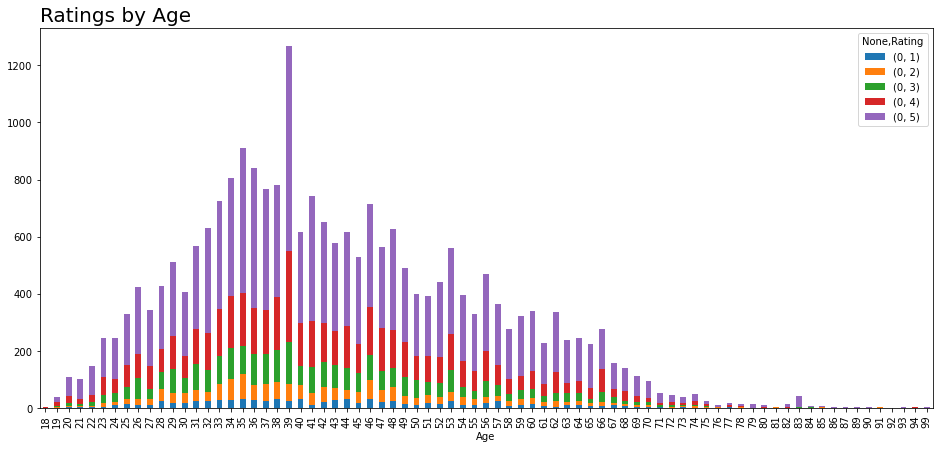

In [36]:
df_plot = df.groupby(['Age','Rating']).size().reset_index().pivot(columns='Rating', index = 'Age')
plot = df_plot.plot(kind = 'bar', stacked = True, figsize = (16,7))
plot.set_title('Ratings by Age', fontsize = 20, loc = 'left')

### Sentiment Analysis

We are going to use TextBlob to make Sentiment Analisys. It's a quite simple package that requires a small number os steps.

* Step 1 Cleaning Data
* Step 2 Get Polarity and Subjectivity values from each review
* Step 3 Use TextBlob Classification Algorithim
* Step 4 Results

Things that I want to do for further analisys:

* Define most used positive/negative words
* Define words used on not recommended

First, we need to adapt our dataframe to make easier to vizualize the results of sentiment analysis. We are going to drop some columns with no use for this part of the project

In [37]:
df_sa = df.drop(labels = ['Class Name', 'Division Name', 'Age', 'Positive Feedback Count', 'Clothing ID'],
                axis = 1
               )
df_sa.head()

,Title,Review Text,Rating,Recommended IND,Department Name,Rating Mean
0,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,Intimate,5.0
1,No Title,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,4.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Dresses,4.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Bottoms,5.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Tops,5.0


The package is capable of dividing strings into sentences or words, giving a list as result

In [64]:
blob = TextBlob(df_sa['Review Text'][1])
blob.sentences

[Sentence("Love this dress!"),
 Sentence("it's sooo pretty."),
 Sentence("i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite."),
 Sentence("i bought a petite and am 5'8"."),
 Sentence("i love the length on me- hits just a little below the knee."),
 Sentence("would definitely be a true midi on someone who is truly petite.")]

In [65]:
blob.words

WordList(['Love', 'this', 'dress', 'it', "'s", 'sooo', 'pretty', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'i', "'m", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'it', "'s", 'petite', 'i', 'bought', 'a', 'petite', 'and', 'am', '5', '8', 'i', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite'])

We can use the sentiment command to get the values of polarity and subjectivity from the text

In [40]:
blob.sentiment

Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)

With that explained, we need now to print the values of polarity and subjectivity on our DataFrame

In [66]:
#Get sentiment values
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

#merge values on DataFrame
df_sa['Polarity'] = df_sa['Review Text'].apply(pol)
df_sa['Subjectivity'] = df_sa['Review Text'].apply(sub)

#see head
df_sa.head()

,Title,Review Text,Rating,Recommended IND,Department Name,Rating Mean,Polarity,Subjectivity,Sentence Polarity,Sentence Subjectivity
0,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,Intimate,5.0,0.633333,0.933333,0.633333,0.933333
1,No Title,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,4.0,0.339583,0.725000,0.350000,0.650000
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Dresses,4.0,0.073675,0.356294,0.054167,0.300000
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Bottoms,5.0,0.550000,0.625000,1.000000,0.750000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Tops,5.0,0.512891,0.568750,0.000000,0.000000


Now we just need to plot the graph and see the results

<AxesSubplot:title={'center':'test'}, xlabel='Polarity', ylabel='Subjectivity'>

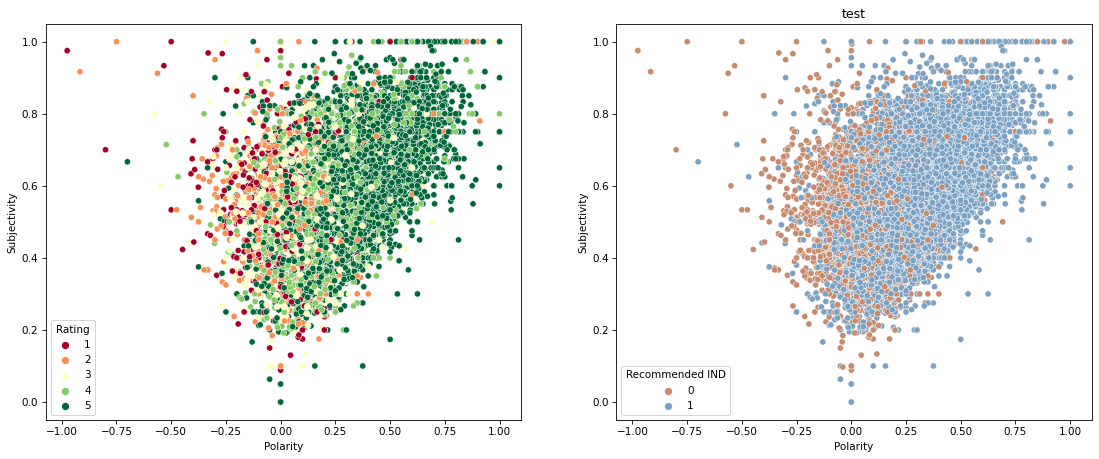

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), dpi=75)

#plot 1
sns.scatterplot(data = df_sa, x = "Polarity", y = "Subjectivity", hue = 'Rating', ax = ax1, palette = 'RdYlGn')
ax2.set_title('test')


#plot 2
sns.scatterplot(data = df_sa, x = "Polarity", y = "Subjectivity", hue = 'Recommended IND', ax = ax2, palette = 'twilight_shifted_r')


In [44]:
review = df['Review Text'][1]
review

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [45]:
blob = TextBlob(review)
blob

TextBlob("Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.")

In [46]:
sent = str(blob.sentences[0])

In [47]:
TextBlob(sent).sentiment

Sentiment(polarity=0.625, subjectivity=0.6)

In [48]:
#full sentence
full = TextBlob(review)
print(full.sentiment)

Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)


In [49]:
#split sentence
sentence = TextBlob(review).sentences[0]
print('First Sentence:\n', sentence, '\n\nResults:\n', TextBlob(str(sentence)).sentiment)
print('--'*25)
print('\nNow with lambda:')


First Sentence:
 Love this dress! 

Results:
 Sentiment(polarity=0.625, subjectivity=0.6)
--------------------------------------------------

Now with lambda:


In [50]:
sentence = TextBlob(review).sentences

for i in sentence:
    print('\n', i,'\n' , TextBlob(str(i)).sentiment.polarity, ' ', TextBlob(str(i)).sentiment.subjectivity,
          '\n','--'*20)


 Love this dress! 
 0.625   0.6 
 ----------------------------------------

 it's sooo pretty. 
 0.25   1.0 
 ----------------------------------------

 i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. 
 0.5   1.0 
 ----------------------------------------

 i bought a petite and am 5'8". 
 0.0   0.0 
 ----------------------------------------

 i love the length on me- hits just a little below the knee. 
 0.15625   0.55 
 ----------------------------------------

 would definitely be a true midi on someone who is truly petite. 
 0.35   0.65 
 ----------------------------------------


In [51]:
#split words
words = TextBlob(review).words

for i in words:
    print('\n', i,'\n' , TextBlob(str(i)).sentiment.polarity, ' ', TextBlob(str(i)).sentiment.subjectivity,
          '\n','--'*20)
    if TextBlob(str(i)).sentiment.polarity > 0:
        print(i)       


 Love 
 0.5   0.6 
 ----------------------------------------
Love

 this 
 0.0   0.0 
 ----------------------------------------

 dress 
 0.0   0.0 
 ----------------------------------------

 it 
 0.0   0.0 
 ----------------------------------------

 's 
 0.0   0.0 
 ----------------------------------------

 sooo 
 0.0   0.0 
 ----------------------------------------

 pretty 
 0.25   1.0 
 ----------------------------------------
pretty

 i 
 0.0   0.0 
 ----------------------------------------

 happened 
 0.0   0.0 
 ----------------------------------------

 to 
 0.0   0.0 
 ----------------------------------------

 find 
 0.0   0.0 
 ----------------------------------------

 it 
 0.0   0.0 
 ----------------------------------------

 in 
 0.0   0.0 
 ----------------------------------------

 a 
 0.0   0.0 
 ----------------------------------------

 store 
 0.0   0.0 
 ----------------------------------------

 and 
 0.0   0.0 
 ----------------------------------------

 i 

Criar TextBlob
criar lista de polarity

In [52]:
#take positive words
pos_list = []
for i in df_sa['Review Text']:
        words = TextBlob(i).words
        for j in words:
            pol = TextBlob(j).sentiment.polarity
            sub = TextBlob(j).sentiment.subjectivity
        if pol > 0:
            pos_list.append([j])
            
df_pos = pd.DataFrame(pos_list,columns=['Words'])

In [53]:
pos_list = []
sub_list = []
for i in df_sa['Review Text']:
    sentence = TextBlob(i).sentences
    for j in sentence:
        sent = TextBlob(str(j)).sentiment   
        list1 = []
        list2 = []
        list1.append(sent[0])
        list2.append(sent[1])
    pos_val = sum(list1)/len(list1)
    sub_val = sum(list2)/len(list2)
    pos_list.append(pos_val)
    sub_list.append(sub_val)   

In [54]:
df_sa['Sentence Polarity'] = pos_list
df_sa['Sentence Subjectivity'] = sub_list

In [55]:
df_sa.head()

,Title,Review Text,Rating,Recommended IND,Department Name,Rating Mean,Polarity,Subjectivity,Sentence Polarity,Sentence Subjectivity
0,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,Intimate,5.0,0.633333,0.933333,0.633333,0.933333
1,No Title,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,4.0,0.339583,0.725000,0.350000,0.650000
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Dresses,4.0,0.073675,0.356294,0.054167,0.300000
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Bottoms,5.0,0.550000,0.625000,1.000000,0.750000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Tops,5.0,0.512891,0.568750,0.000000,0.000000


<AxesSubplot:xlabel='Sentence Polarity', ylabel='Sentence Subjectivity'>

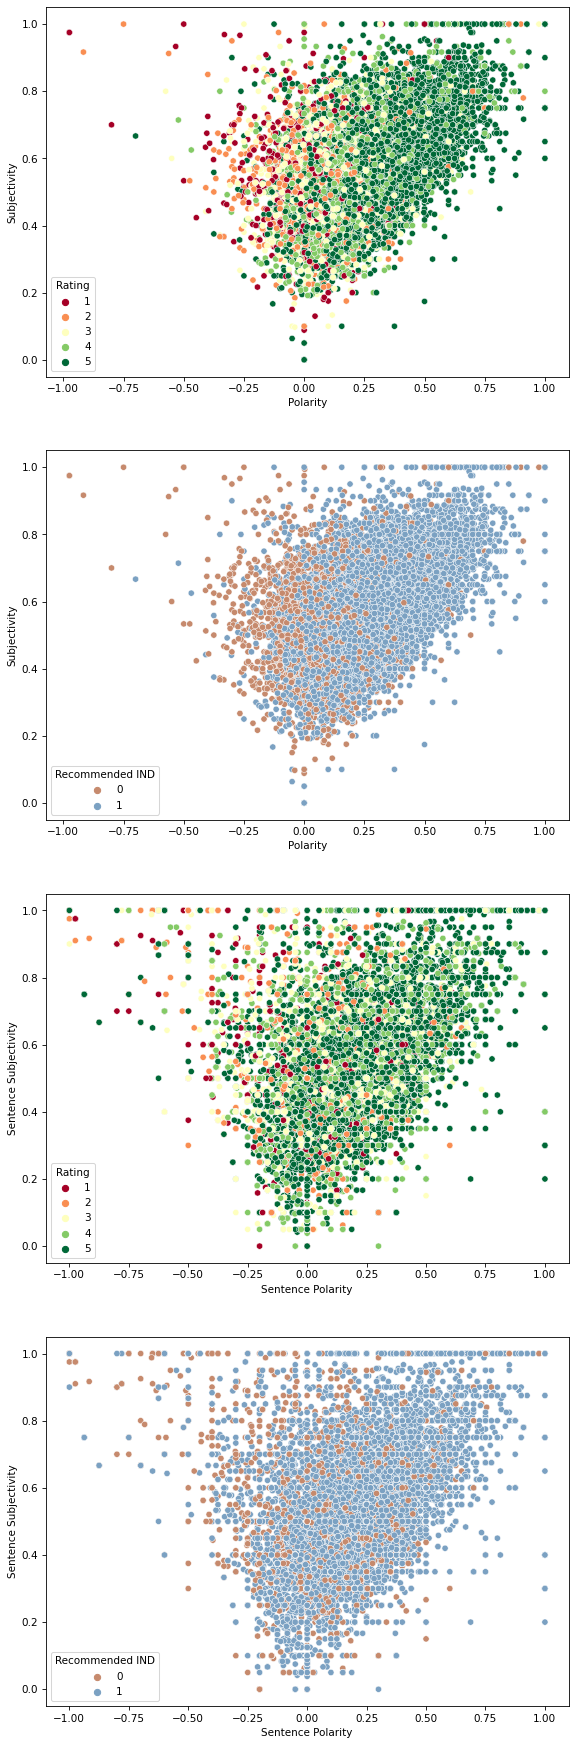

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 30), dpi=75)
sns.scatterplot(data = df_sa, x = "Polarity", y = "Subjectivity", hue = 'Rating', ax = ax1, palette = 'RdYlGn')
sns.scatterplot(data = df_sa, x = "Polarity", y = "Subjectivity", hue = 'Recommended IND', ax = ax2, palette = 'twilight_shifted_r')
sns.scatterplot(data = df_sa, x = "Sentence Polarity", y = "Sentence Subjectivity", hue = 'Rating', ax = ax3, palette = 'RdYlGn')
sns.scatterplot(data = df_sa, x = "Sentence Polarity", y = "Sentence Subjectivity", hue = 'Recommended IND', ax = ax4, palette = 'twilight_shifted_r')

### Extra: Word Cloud

Lets creat a simple word count for this 

In [57]:
df_pos

,Words
0,comfortable
1,happy
2,great
3,fitting
4,cute
...,...
2587,comfortable
2588,stunning
2589,favorite
2590,ok


In [58]:
wc = WordCloud().generate(str(df_pos['Words'])) 

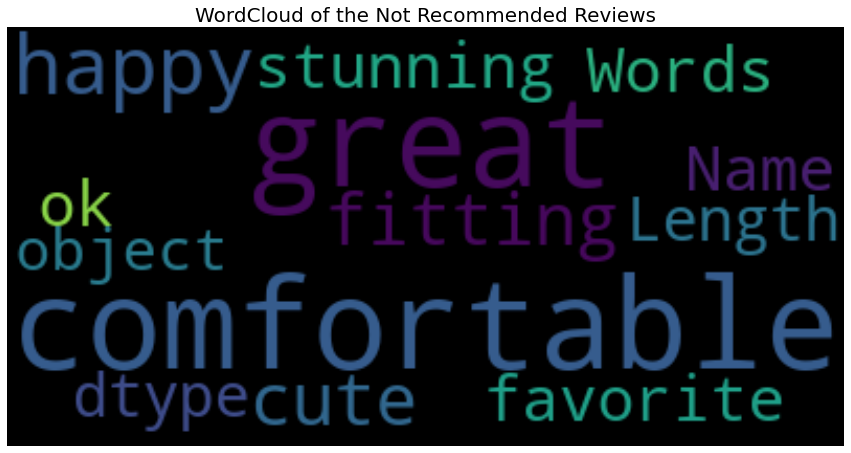

In [59]:
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud of the Not Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [60]:
test_list = [[2,1],[3,4]]
test_list[1][1]

4

In [61]:
test_list.append([5,6])
test_list

[[2, 1], [3, 4], [5, 6]]

In [62]:
sum(test_list[:][1])

7

In [63]:
test_list[[1,0]]

TypeError: list indices must be integers or slices, not list